In [1]:
# 0 = No , 1 = Yes
# pclass , 1 = 1st , 2 = 2nd , 3 = 3rd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('./titanic/train.csv')

X = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

labels = X["Survived"]
X = X.drop("Survived", axis=1)

X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Fare"] = X["Fare"].fillna(X["Fare"].mean())
X["Embarked"] = X["Embarked"].fillna(X["Embarked"].sample(random_state=42).iloc[0])

print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
None
           Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   13.002015    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000   29.699118    0.000000    0.000000   14.454200
75%      3.0000

In [19]:
# data preprocess
X["Sex"] = X["Sex"].map({"male" : 0 , "female" : 1}) # male : 0 , female : 1
X["Embarked"] = X["Embarked"].map({"S" : 0 , "Q" : 1 , "C" : 2})
Age_bin_col = pd.cut(X['Age'], bins=4, labels=[0, 1, 2, 3])
Fare_bin_col = pd.cut(X['Fare'], bins=5, labels=range(5))

X = X.drop(["Age", "Fare"], axis=1)
X["Age"] = Age_bin_col
X["Fare"] = Fare_bin_col
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,0,1,0,0,1,0
1,1,1,1,0,2,1,0
2,3,1,0,0,0,1,0
3,1,1,1,0,0,1,0
4,3,0,0,0,0,1,0


In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , labels , test_size=0.15 , random_state=42)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(757, 7) (134, 7) (757,) (134,)


Accuracy:  0.7611940298507462


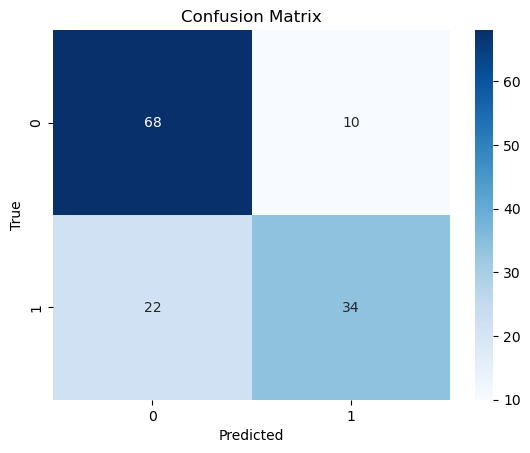

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        78
           1       0.77      0.61      0.68        56

    accuracy                           0.76       134
   macro avg       0.76      0.74      0.74       134
weighted avg       0.76      0.76      0.76       134



In [21]:
model = CategoricalNB(alpha=1.0)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test , y_pred))
mtx = confusion_matrix(y_test , y_pred)
sns.heatmap(mtx , annot=True , fmt="d" , cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test , y_pred))

In [26]:
pred_df = pd.read_csv('./titanic/test.csv')

pred_df = pred_df.drop(["Cabin" , "Name" , "Ticket"] , axis=1)

# data preprocess , handle missing values
pred_df["Age"] = pred_df["Age"].fillna(X["Age"].mode()[0])
pred_df["Fare"] = pred_df["Fare"].fillna(X["Fare"].mode()[0])
# change stirings to numbers
pred_df["Sex"] = pred_df["Sex"].map({"male" : 0 , "female" : 1})
pred_df["Embarked"] = pred_df["Embarked"].map({"S" : 0 , "Q" : 1 , "C" : 2})
# binning
Age_bin_col = pd.cut(pred_df['Age'], bins=4, labels=[0, 1, 2, 3])
Fare_bin_col = pd.cut(pred_df['Fare'], bins=5, labels=range(5))
pred_df = pred_df.drop(["Age", "Fare"], axis=1)
pred_df["Age"] = Age_bin_col
pred_df["Fare"] = Fare_bin_col
# handle extreme value in Parch col
pred_df["Parch"] = pred_df["Parch"].apply(lambda x: 6 if x > 6 else x)

idx_col = pred_df["PassengerId"]
pred_df = pred_df.drop(["PassengerId"] , axis=1)
# finish data preprocess
print(pred_df.head())
print(pred_df.shape)

   Pclass  Sex  SibSp  Parch  Embarked Age Fare
0       3    0      0      0         1   1    0
1       3    1      1      0         0   2    0
2       2    0      0      0         1   3    0
3       3    0      0      0         0   1    0
4       3    1      1      1         0   1    0
(418, 7)


In [28]:
# predict
pred = model.predict(pred_df) 
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [30]:
submit = pd.DataFrame({"PassengerId" : idx_col , "Survived" : pred})
submit.to_csv("submission.csv" , index=False)